# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)


Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


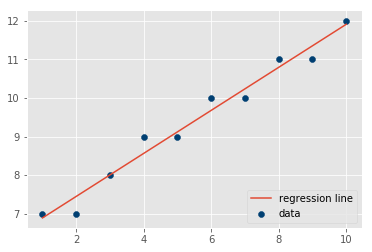

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

In [5]:
# My code:
X,Y

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 7.,  7.,  8.,  9.,  9., 10., 10., 11., 11., 12.]))

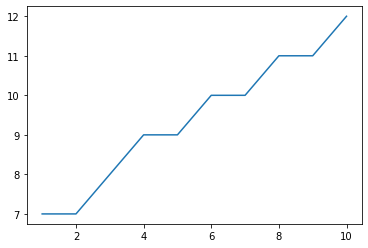

In [7]:
# visualization of Y vs. X
plt.plot(X,Y)

In [10]:
# Linear regression using formulas
def LinearReg(xs,ys):
    """
    given predictor variables X 
    and dependent variable Y
    find slope and intercept of linear model fitting best the data
    """
# calculate slope as: 
# (mean(x) * mean(y) – mean(x*y)) / ( mean (x)^2 – mean( x^2))
    xsys=xs*ys
    xs2=xs*xs
    ys2=ys*ys
    slope=(xs.mean()*ys.mean()- xsys.mean()) / ((xs.mean())**2 - xs2.mean())
    
    intercept = ys.mean() - slope*xs.mean()
    return slope,intercept
    
    
slope,intercept = LinearReg(X,Y)    
slope,intercept

(0.5575757575757568, 6.3333333333333375)

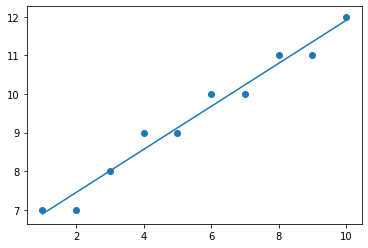

In [12]:
# visualization
Y_hat=np.array([slope*X_val+intercept for X_val in X])
plt.scatter(X,Y)
plt.plot(X,Y_hat)

In [15]:
# calculate R-squared
def sq_err(y_real, y_predicted):
    """
    input
    y_real : true y values
    y_predicted : regression line
    return
    squared error between regression and true line (ss_tot)
    """
    ss_tot=0
    d=y_real-y_predicted
    ss_tot= np.sum([ t**2 for t in d ])
    return ss_tot


def r_squared(y_real, y_predicted):
    """
    input
    y_real: real values
    y_predicted: regression values
    
    return
    r_squared value
    """
    # mean of y_real
    y_bar_value = np.mean(y_real)
    y_bar_array = np.array([y_bar_value for i in y_real])

    # calculate SSR or SSE 
    SSR_value = sq_err(y_real, y_predicted)
    
    # calculate SST
    SST_value = sq_err(y_real, y_bar_array)

    # calculate R-squared
    R2 = 1- SSR_value/SST_value
    
    return R2

R2 = r_squared(Y,Y_hat)
R2

0.9715335169880626

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

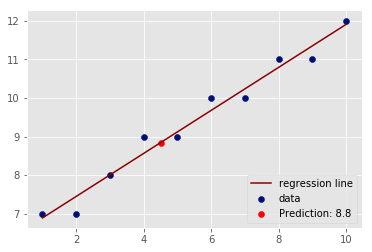

In [66]:
# Make prediction for x = 4.5 and visualize on the scatter plot

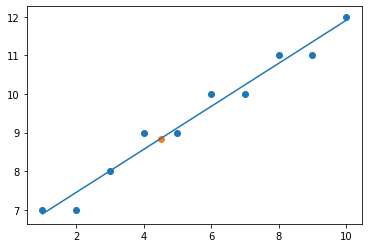

In [16]:
# Make prediction for x = 4.5 and visualize on the scatter plot
ypred= slope*4.5+intercept
# visualization

plt.scatter(X,Y)
plt.plot(X,Y_hat)
plt.scatter(4.5,ypred)


## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 


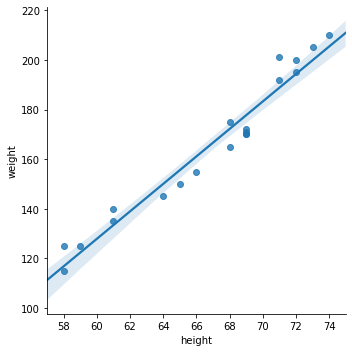

In [23]:
df = pd.read_csv('heightWeight.csv')
sns.lmplot(x='height',y='weight',data = df)

In [26]:
X= np.array(df.height)
Y= np.array(df.weight)

slope,intercept = LinearReg(X,Y)  
Y_hat=np.array([slope*X_val+intercept for X_val in X])
R2 = r_squared(Y,Y_hat)

print(slope,intercept,R2)



5.539019232705614 -204.48343570637024 0.9553099288673668


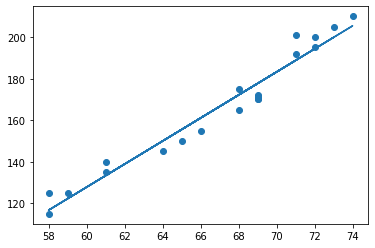

In [27]:
plt.scatter(X,Y)
plt.plot(X,Y_hat)



## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 